<a href="https://colab.research.google.com/github/madhu9sudhana/Python_Examples/blob/master/PCA_Example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import os

In [0]:
x = np.array( ((2,3), (3, 5)) )
print(x)

[[2 3]
 [3 5]]


In [0]:
y = np.array( ((1,2), (5, -1)) )
print(y)

[[ 1  2]
 [ 5 -1]]


In [0]:
w = np.array( ((1,2,5), (5, -1,6), (3, 5,3)) )
print(w)

[[ 1  2  5]
 [ 5 -1  6]
 [ 3  5  3]]


## Matrix Operations : Addition

In [0]:
x + y


array([[3, 5],
       [8, 4]])

## Matrix Operations : Subtraction

In [0]:
x - y

array([[ 1,  1],
       [-2,  6]])

##Matrix Operation :  Scalar Multiplication

In [0]:
2 * y

array([[ 2,  4],
       [10, -2]])

## Matrix Operations : Dot Products - Numpy

In [0]:
type(np.dot(x,y))

numpy.ndarray

##Matrix Multiplication without Numpy

In [0]:
def Multiply(x,y):
  if x.shape[1] == y.shape[0]:
    z = []
    for i in range(0,len(x)):
      temp=[]
      for j in range(0,len(y[0])):
          s = 0
          for k in range(0,len(x[0])):
              s += x[i][k]*y[k][j]
          temp.append(s)
      z.append(temp)
    z = np.asarray(z)
    return z
  else:
    return print("Matrix muliplication is not possible")

## Example of Matrix Multiplication 

In [0]:
Multiply(x, y)

array([[17,  1],
       [28,  1]])

In [0]:
Multiply(x, w)

Matrix muliplication is not possible


## Eigen value and Eigen vector Calculation using Numpy

In [0]:
e_vals, e_vecs = np.linalg.eig(w)
print(e_vals,"\n")
print(e_vecs)

[ 9.84997656 -2.91662208 -3.93335448] 

[[-0.49533504 -0.63893326 -0.38385664]
 [-0.58393457 -0.39661341 -0.66214471]
 [-0.64316687  0.65913739  0.64359806]]


# Importing Sample data for PCA 

In [0]:
from google.colab import files
import io

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving PCA_Data.csv to PCA_Data (1).csv
User uploaded file "PCA_Data.csv" with length 266 bytes


In [0]:
df = pd.read_csv(io.StringIO(uploaded['PCA_Data.csv'].decode('utf-8')))
df.columns = ['Calories', 'Breakfast', 'Lunch', 'Dinner', 'Exercise', 'Body_shape']
print(df.head())

   Calories  Breakfast  Lunch  Dinner  Exercise Body_shape
0      1200          1      0       0         2     Skinny
1      2800          1      1       1         1     Normal
2      3500          2      2       1         0        Fat
3      1400          0      1       0         3     Skinny
4      5000          2      2       2         0        Fat


## Selecting only independent variables

In [0]:
df_Ind = df[['Calories', 'Breakfast', 'Lunch', 'Dinner', 'Exercise']]
df_Ind.head()

,Calories,Breakfast,Lunch,Dinner,Exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0


## Standard scaling of the dataframe

In [0]:
df_Ind_std = (df_Ind - np.mean(df_Ind))/np.std(df_Ind)
df_Ind_std.head()

,Calories,Breakfast,Lunch,Dinner,Exercise
0,-1.352058,0.000000,-1.376494,-1.285714,1.0
1,0.017115,0.000000,-0.229416,0.142857,0.0
2,0.616128,1.290994,0.917663,0.142857,-1.0
3,-1.180911,-1.290994,-0.229416,-1.285714,2.0
4,1.899727,1.290994,0.917663,1.571429,-1.0


## Calculation of Covariance Matrix

In [0]:
features = df_Ind_std.T
cov_mat = np.cov(features)
cov_mat

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

##Eigen Vectors and Eigen Values from Covariance Matrix

In [0]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [0]:
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [0]:
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]



##Project data point onto selected Eigen Vector


In [0]:
proj_x = df_Ind_std.dot(eig_vecs.T[0])
proj_x

0    2.226009
1    0.018143
2   -1.762966
3    2.735424
4   -3.027115
5    2.147026
6    0.371425
7   -2.592399
8    0.393478
9   -0.509025
dtype: float64

In [0]:
proj_y = np.dot(df_Ind_std, eig_vecs.T[0])
print(proj_y)
print(df_Ind_std.shape)
print(eig_vecs.T[0].shape)

[ 2.22600943  0.0181432  -1.76296611  2.73542407 -3.02711544  2.14702579
  0.37142473 -2.59239883  0.39347815 -0.50902498]
(10, 5)
(5,)


In [0]:
PC1 = pd.DataFrame(proj_x, columns = ['pc1'])
PC1['y_axis'] = 0
PC1['label'] = df[['Body_shape']]
PC1

,pc1,y_axis,label
0,2.226009,0,Skinny
1,0.018143,0,Normal
2,-1.762966,0,Fat
3,2.735424,0,Skinny
4,-3.027115,0,Fat
5,2.147026,0,Skinny
6,0.371425,0,Normal
7,-2.592399,0,Fat
8,0.393478,0,Normal
9,-0.509025,0,Fat


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,1,'PCA result')

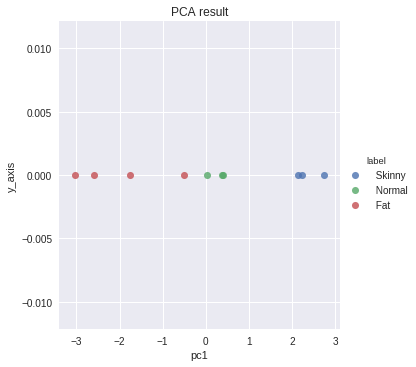

In [0]:
sns.lmplot('pc1', 'y_axis', data=PC1, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color
# title
plt.title('PCA result')